In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=1000, noise=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

(1000, 2) (1000,)


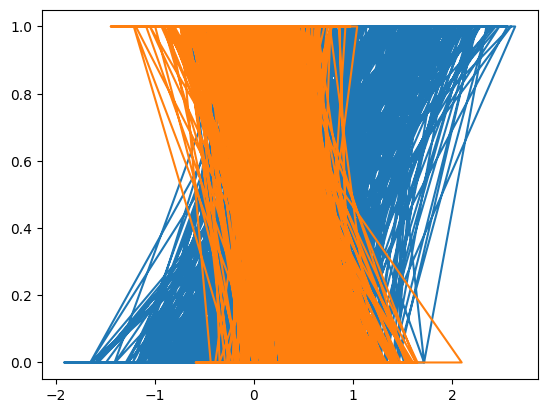

In [2]:
import matplotlib.pyplot as plt
print(X.shape, y.shape)
plt.plot(X, y)
plt.show()

Usign sklearn to create an MLP

In [3]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),activation='relu', max_iter=1000,alpha=0.01).fit(X_train, y_train)

print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))


0.9026666666666666
0.896


Breast Cancer Dataset

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier

cancer = load_breast_cancer()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)


Scaling

In [6]:
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [7]:
mlp = MLPClassifier(max_iter=500,alpha=1) # alpha is the regularising term
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.99


In [8]:
mlp.predict_proba(X_test_scaled)[1]

array([0.02725936, 0.97274064])